Finding out the relationship in Economic trends and House Prices movements in Spain through online sources (Statistia, Macrotrend)

In [26]:
# Import required libraries
import pandas as pd
import requests
from bs4 import BeautifulSoup
from plotnine import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Using Spain GDP as an indicator of volitility of economic activities

# Manually extract from website since abstraction from extraction from Statista requires paid membership
# https://www.statista.com/statistics/1198549/evolution-rental-residential-property-prices-spain/

rental_price = [
    {'Year': 2006, 'Euros/sqm': 9.3},
    {'Year': 2007, 'Euros/sqm': 8.8},
    {'Year': 2008, 'Euros/sqm': 8.1},
    {'Year': 2009, 'Euros/sqm': 7.7},
    {'Year': 2010, 'Euros/sqm': 7.7},
    {'Year': 2011, 'Euros/sqm': 8.2},
    {'Year': 2012, 'Euros/sqm': 7.9},
    {'Year': 2013, 'Euros/sqm': 7.3},
    {'Year': 2014, 'Euros/sqm': 7.3},
    {'Year': 2015, 'Euros/sqm': 7.6},
    {'Year': 2016, 'Euros/sqm': 8.2},
    {'Year': 2017, 'Euros/sqm': 9.2},
    {'Year': 2018, 'Euros/sqm': 10.4},
    {'Year': 2019, 'Euros/sqm': 11},
    {'Year': 2020, 'Euros/sqm': 11.4},
    {'Year': 2021, 'Euros/sqm': 10.7},
]

rental = pd.DataFrame(rental_price)
rental


,Year,Euros/sqm
0,2006,9.3
1,2007,8.8
2,2008,8.1
3,2009,7.7
4,2010,7.7
5,2011,8.2
6,2012,7.9
7,2013,7.3
8,2014,7.3
9,2015,7.6


In [3]:
# Display the data types of columns
column_types = rental.dtypes
print(column_types)

Year           int64
Euros/sqm    float64
dtype: object


In [4]:
rental['Year'] = rental['Year'].astype(int)
rental

,Year,Euros/sqm
0,2006,9.3
1,2007,8.8
2,2008,8.1
3,2009,7.7
4,2010,7.7
5,2011,8.2
6,2012,7.9
7,2013,7.3
8,2014,7.3
9,2015,7.6


In [14]:
# Using online sources for the overall rental price trends for the Spanish housing market thorugh webscrape

# URL of the webpage
url = 'https://www.macrotrends.net/countries/ESP/spain/gdp-gross-domestic-product'

# Send a GET request to the webpage
response = requests.get(url)

# Create a BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the webpage
tables = soup.find_all('table', class_='historical_data_table')

# Extract the second table
table = tables[1]

# Extract the table rows
rows = table.find_all('tr')

# Initialize empty lists to store the data
data = []

# Iterate over the rows and extract the data
for row in rows:
    # Extract the cells in each row
    cells = row.find_all('td')
    
    # Extract the text from each cell
    row_data = [cell.text.strip() for cell in cells]
    
    # Append the row data to the list
    data.append(row_data)

# Remove empty rows from the data
data = [row for row in data if row]

# Extract the header row
header = data[0]

# Create a DataFrame from the remaining rows
gdp = pd.DataFrame(data[1:], columns=header)

# Print the DataFrame
print(gdp)

# Need to correct header


    2021  $1,427.38B  $30,104    5.52%
0   2020  $1,276.96B  $26,960  -11.33%
1   2019  $1,394.32B  $29,582    1.98%
2   2018  $1,421.70B  $30,380    2.28%
3   2017  $1,313.25B  $28,185    2.98%
4   2016  $1,233.55B  $26,537    3.04%
..   ...         ...      ...      ...
56  1964     $21.34B     $675    5.31%
57  1963     $19.07B     $609    9.60%
58  1962     $16.14B     $520    9.95%
59  1961     $13.83B     $450   11.84%
60  1960     $12.07B     $396        %

[61 rows x 4 columns]


In [15]:
# Save 2021 outputs
header = gdp.columns.tolist()
print(header)
static_header = header

['2021', '$1,427.38B', '$30,104', '5.52%']


In [16]:
# Replace header with correct headers
gdp.columns = ['Year', 'GDP (B)', 'GDP per capita', 'GDP growth']
gdp

,Year,GDP (B),GDP per capita,GDP growth
0,2020,"$1,276.96B","$26,960",-11.33%
1,2019,"$1,394.32B","$29,582",1.98%
2,2018,"$1,421.70B","$30,380",2.28%
3,2017,"$1,313.25B","$28,185",2.98%
4,2016,"$1,233.55B","$26,537",3.04%
...,...,...,...,...
56,1964,$21.34B,$675,5.31%
57,1963,$19.07B,$609,9.60%
58,1962,$16.14B,$520,9.95%
59,1961,$13.83B,$450,11.84%


In [17]:
# Only keep relevant years
gdp = gdp.head(15)
gdp

,Year,GDP (B),GDP per capita,GDP growth
0,2020,"$1,276.96B","$26,960",-11.33%
1,2019,"$1,394.32B","$29,582",1.98%
2,2018,"$1,421.70B","$30,380",2.28%
3,2017,"$1,313.25B","$28,185",2.98%
4,2016,"$1,233.55B","$26,537",3.04%
5,2015,"$1,196.16B","$25,754",3.84%
6,2014,"$1,371.82B","$29,514",1.40%
7,2013,"$1,355.58B","$29,077",-1.40%
8,2012,"$1,324.75B","$28,323",-2.96%
9,2011,"$1,480.71B","$31,678",-0.81%


In [18]:
# Include 2021 results
gdp.loc[len(gdp)] = static_header
gdp

/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/727402093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp.loc[len(gdp)] = static_header


,Year,GDP (B),GDP per capita,GDP growth
0,2020,"$1,276.96B","$26,960",-11.33%
1,2019,"$1,394.32B","$29,582",1.98%
2,2018,"$1,421.70B","$30,380",2.28%
3,2017,"$1,313.25B","$28,185",2.98%
4,2016,"$1,233.55B","$26,537",3.04%
5,2015,"$1,196.16B","$25,754",3.84%
6,2014,"$1,371.82B","$29,514",1.40%
7,2013,"$1,355.58B","$29,077",-1.40%
8,2012,"$1,324.75B","$28,323",-2.96%
9,2011,"$1,480.71B","$31,678",-0.81%


In [19]:
# Simplify formatting in dataframe

# Removing commas and dollar signs from 'GDP' and 'GDP per capita' columns
gdp['GDP (B)'] = gdp['GDP (B)'].apply(lambda x: x.replace(',', '').replace('$', '') if isinstance(x, str) else x)
gdp['GDP per capita'] = gdp['GDP per capita'].apply(lambda x: x.replace(',', '').replace('$', '') if isinstance(x, str) else x)

# Remove the percentage sign and convert to float for GDP growth column
gdp['GDP growth'] = gdp['GDP growth'].str.rstrip('%').astype(float) / 100

# Remove B for GDP column
gdp['GDP (B)'] = gdp['GDP (B)'].str.replace('B', '')
gdp['GDP (B)'] = gdp['GDP (B)'].astype(float)

gdp

/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/2687377434.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['GDP (B)'] = gdp['GDP (B)'].apply(lambda x: x.replace(',', '').replace('$', '') if isinstance(x, str) else x)
/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/2687377434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['GDP per capita'] = gdp['GDP per capita'].apply(lambda x: x.replace(',', '').replace('$', '') if isinstance(x, str) else x)
/var/folders/7

,Year,GDP (B),GDP per capita,GDP growth
0,2020,1276.96,26960,-0.1133
1,2019,1394.32,29582,0.0198
2,2018,1421.70,30380,0.0228
3,2017,1313.25,28185,0.0298
4,2016,1233.55,26537,0.0304
5,2015,1196.16,25754,0.0384
6,2014,1371.82,29514,0.0140
7,2013,1355.58,29077,-0.0140
8,2012,1324.75,28323,-0.0296
9,2011,1480.71,31678,-0.0081


In [20]:
# Display the data types of columns
column_types2 = gdp.dtypes
print(column_types2)

Year               object
GDP (B)           float64
GDP per capita     object
GDP growth        float64
dtype: object


In [21]:
# Change types for columns
gdp['Year'] = gdp['Year'].astype(int)
gdp['GDP (B)'] = gdp['GDP (B)'].astype(float)
gdp


/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/3892426670.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['Year'] = gdp['Year'].astype(int)
/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/3892426670.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp['GDP (B)'] = gdp['GDP (B)'].astype(float)


,Year,GDP (B),GDP per capita,GDP growth
0,2020,1276.96,26960,-0.1133
1,2019,1394.32,29582,0.0198
2,2018,1421.70,30380,0.0228
3,2017,1313.25,28185,0.0298
4,2016,1233.55,26537,0.0304
5,2015,1196.16,25754,0.0384
6,2014,1371.82,29514,0.0140
7,2013,1355.58,29077,-0.0140
8,2012,1324.75,28323,-0.0296
9,2011,1480.71,31678,-0.0081


In [22]:
# Merge the two dataframe

merged_df = pd.merge(rental, gdp, on='Year')
merged_df

,Year,Euros/sqm,GDP (B),GDP per capita,GDP growth
0,2006,9.3,1260.40,28389,0.0410
1,2007,8.8,1474.00,32591,0.0360
2,2008,8.1,1631.86,35511,0.0089
3,2009,7.7,1491.47,32170,-0.0376
4,2010,7.7,1422.11,30532,0.0016
5,2011,8.2,1480.71,31678,-0.0081
6,2012,7.9,1324.75,28323,-0.0296
7,2013,7.3,1355.58,29077,-0.0140
8,2014,7.3,1371.82,29514,0.0140
9,2015,7.6,1196.16,25754,0.0384


/var/folders/7l/mb9qpc9s6hx1sxj1gmfv_drr0000gn/T/ipykernel_64601/3853255616.py:27: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


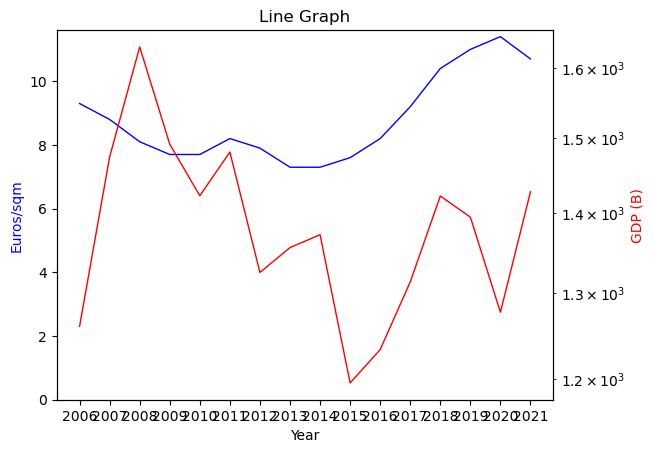

In [25]:
# Create graph with two axis - Euro/sqm and GDP (B)

# Convert the 'Year' column to string type
merged_df['Year'] = merged_df['Year'].astype(str)

# Convert 'GDP (B)' column to numeric
merged_df['GDP (B)'] = pd.to_numeric(merged_df['GDP (B)'], errors='coerce')

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(merged_df['Year'], merged_df['Euros/sqm'], color='blue', linewidth=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Euros/sqm', color='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second line with logarithmic scale
ax2.plot(merged_df['Year'], merged_df['GDP (B)'], color='red', linewidth=1)
ax2.set_yscale('log')
ax2.set_ylabel('GDP (B)', color='red')

# Set the y-axis limits for both axes
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

# Set the title
plt.title('Line Graph')

# Show the plot
plt.show()



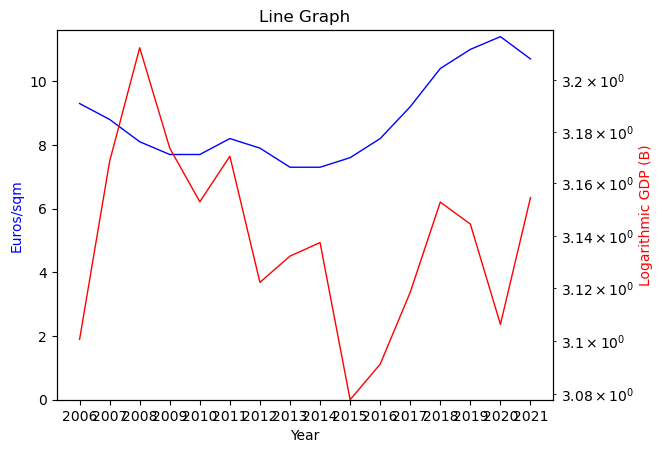

In [193]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the 'Year' column to string type
merged_df['Year'] = merged_df['Year'].astype(str)

# Convert 'GDP (B)' column to numeric
merged_df['GDP (B)'] = pd.to_numeric(merged_df['GDP (B)'], errors='coerce')

# Create a figure and axes
fig, ax1 = plt.subplots()

# Plot the first line
ax1.plot(merged_df['Year'], merged_df['Euros/sqm'], color='blue', linewidth=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Euros/sqm', color='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Set the y-axis scale to logarithmic
ax2.set_yscale('log')

# Calculate logarithmic values for 'GDP (B)' column
log_gdp = np.log10(merged_df['GDP (B)'])

# Plot the second line with logarithmic-scaled 'GDP (B)'
ax2.plot(merged_df['Year'], log_gdp, color='red', linewidth=1)
ax2.set_ylabel('Logarithmic GDP (B)', color='red')

# Set the y-axis limits
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=np.log10(merged_df['GDP (B)']).min())  # Adjust the lower limit for the logarithmic scale

# Set the title
plt.title('Line Graph')

# Show the plot
plt.show()


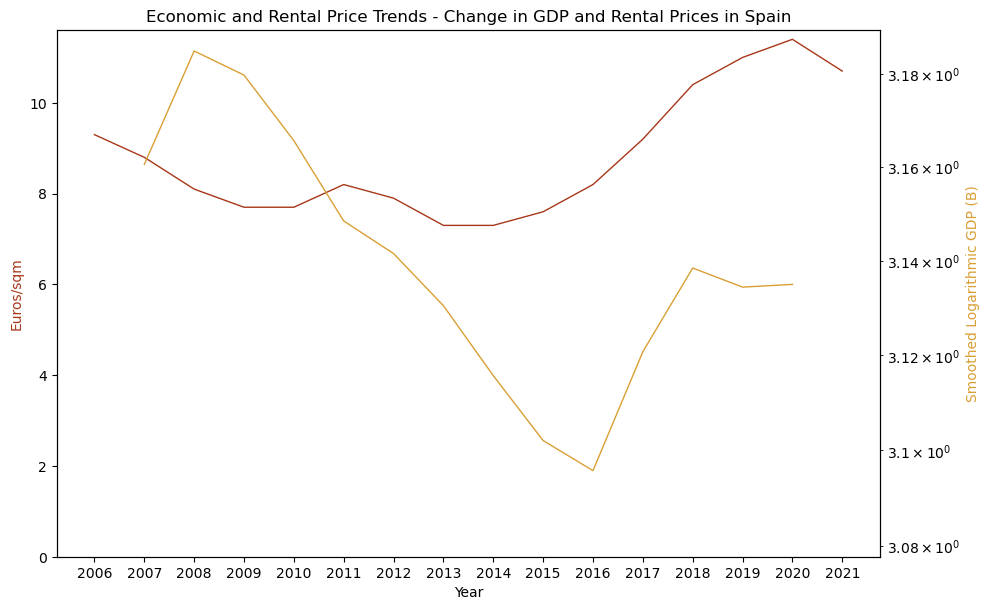

In [28]:
# Create new graph with different colours and changed labels with loged GDP to illustrate changes

# Convert the 'Year' column to string type
merged_df['Year'] = merged_df['Year'].astype(str)

# Convert 'GDP (B)' column to numeric
merged_df['GDP (B)'] = pd.to_numeric(merged_df['GDP (B)'], errors='coerce')

# Create a figure and axes with adjusted size
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first line
ax1.plot(merged_df['Year'], merged_df['Euros/sqm'], color='#A73719', linewidth=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Euros/sqm', color='#A73719')

# Create a second y-axis
ax2 = ax1.twinx()

# Set the y-axis scale to logarithmic
ax2.set_yscale('log')

# Calculate logarithmic values for 'GDP (B)' column
log_gdp = np.log10(merged_df['GDP (B)'])

# Apply smoothing using a rolling average
window = 3  # Adjust the window size as needed
smoothed_log_gdp = log_gdp.rolling(window=window, center=True).mean()

# Plot the second line with smoothed logarithmic-scaled 'GDP (B)'
ax2.plot(merged_df['Year'], smoothed_log_gdp, color='#D99F34', linewidth=1)
ax2.set_ylabel('Smoothed Logarithmic GDP (B)', color='#D99F34')

# Set the y-axis limits
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=np.log10(merged_df['GDP (B)']).min())  # Adjust the lower limit for the logarithmic scale

# Rotate the x-axis tick labels vertically
plt.xticks(rotation=90)

# Adjust spacing and alignment of the plot
plt.tight_layout()

# Set the title
plt.title('Economic and Rental Price Trends - Change in GDP and Rental Prices in Spain')

# Show the plot
plt.show()

